In [1]:
"""
Extracting signals of a probabilistic atlas of rest functional regions
========================================================================

This example extracts the signal on regions defined via a probabilistic
atlas, to construct a functional connectome.

We use the `MSDL atlas
<https://team.inria.fr/parietal/research/spatial_patterns/spatial-patterns-in-resting-state/>`_
of functional regions in rest.

The key to extract signals is to use the
:class:`nilearn.input_data.NiftiMapsMasker` that can transform nifti
objects to time series using a probabilistic atlas.

As the MSDL atlas comes with (x, y, z) MNI coordinates for the different
regions, we can visualize the matrix as a graph of interaction in a
brain. To avoid having too dense a graph, we represent only the 20% edges
with the highest values.

https://circle-artifacts.com/gh/nilearn/nilearn/287/artifacts/0/home/ubuntu/
nilearn/doc/_build/html/auto_examples/connectivity/
plot_probabilistic_atlas_extraction.html#
example-connectivity-plot-probabilistic-atlas-extraction-py
"""

'\nExtracting signals of a probabilistic atlas of rest functional regions\n========================================================================\n\nThis example extracts the signal on regions defined via a probabilistic\natlas, to construct a functional connectome.\n\nWe use the `MSDL atlas\n<https://team.inria.fr/parietal/research/spatial_patterns/spatial-patterns-in-resting-state/>`_\nof functional regions in rest.\n\nThe key to extract signals is to use the\n:class:`nilearn.input_data.NiftiMapsMasker` that can transform nifti\nobjects to time series using a probabilistic atlas.\n\nAs the MSDL atlas comes with (x, y, z) MNI coordinates for the different\nregions, we can visualize the matrix as a graph of interaction in a\nbrain. To avoid having too dense a graph, we represent only the 20% edges\nwith the highest values.\n\nhttps://circle-artifacts.com/gh/nilearn/nilearn/287/artifacts/0/home/ubuntu/\nnilearn/doc/_build/html/auto_examples/connectivity/\nplot_probabilistic_atlas_extr

First subject resting-state nifti image (4D) is located at: /home/takanori/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz
[NiftiMapsMasker.fit_transform] loading regions from /home/takanori/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii

/home/takanori/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:94: DeprecationWarning: Function fetch_msdl_atlas is deprecated; it has been replace by fetch_atlas_msdl and will be removed in nilearn 0.1.5
  warnings.warn(msg, category=DeprecationWarning)
/home/takanori/anaconda/lib/python2.7/site-packages/nilearn-0.1.5.dev0-py2.7.egg/nilearn/_utils/cache_mixin.py:218: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "



Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7fa7dfb75950>, target_shape=(61, 73, 61), target_affine=array([[  -3.,   -0.,   -0.,   90.],
       [  -0.,    3.,   -0., -126.],
       [   0.,    0.,    3.,  -72.],
       [   0.,    0.,    0.,    1.]]), interpolation='continuous')
_____________________________________________________resample_img - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/takanori/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', 
{ 'detrend': False,
  'high_pass': None,
  'low_pass': None,
  'maps_img': '/home/takanori/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_

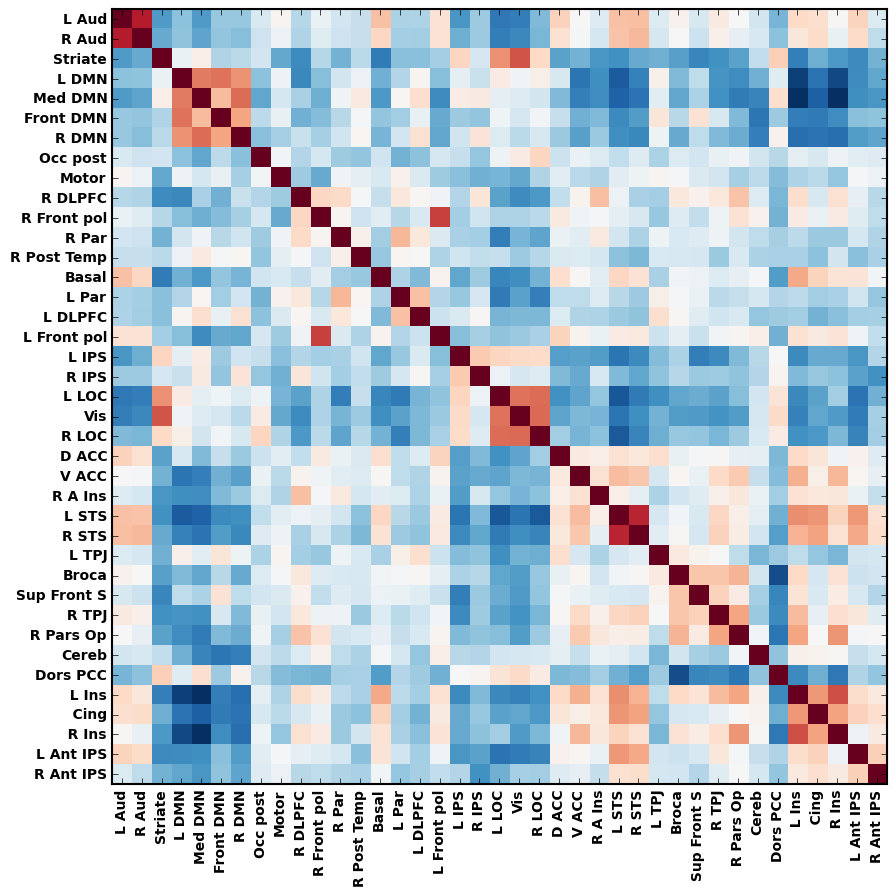

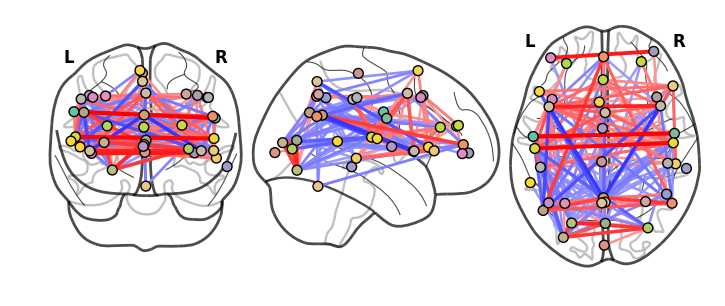

In [2]:
from nilearn import datasets
atlas = datasets.fetch_msdl_atlas()
atlas_filename = atlas['maps']

# Load the labels
import numpy as np
csv_filename = atlas['labels']

# The recfromcsv function can load a csv file
labels = np.recfromcsv(csv_filename)
names = labels['name']

from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)

data = datasets.fetch_adhd(n_subjects=1)

# print basic dataset information
print('First subject resting-state nifti image (4D) is located at: %s' %
      data.func[0])

time_series = masker.fit_transform(data.func[0],
                                   confounds=data.confounds)

correlation_matrix = np.corrcoef(time_series.T)

# Display the correlation matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, interpolation="nearest")
# And display the labels
x_ticks = plt.xticks(range(len(names)), names, rotation=90)
y_ticks = plt.yticks(range(len(names)), names)

# And now display the corresponding graph
from nilearn import plotting
coords = labels[['x', 'y', 'z']].tolist()

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="80%")

plotting.show()

In [3]:
labels

rec.array([(-53.28, -8.88, 32.36, 'L Aud', 'Aud'),
       (53.47, -6.49, 27.52, 'R Aud', 'Aud'),
       (1.18, -74.54, 10.79, 'Striate', 'Striate'),
       (-45.8, -64.78, 31.84, 'L DMN', 'DMN'),
       (-0.2, -55.21, 29.87, 'Med DMN', 'DMN'),
       (-0.15, 51.42, 7.58, 'Front DMN', 'DMN'),
       (51.66, -59.34, 28.88, 'R DMN', 'DMN'),
       (0.41, -91.05, 1.58, 'Occ post', 'Occ post'),
       (-1.48, -27.93, 61.5, 'Motor', 'Motor'),
       (40.1, 20.96, 44.72, 'R DLPFC', 'R V Att'),
       (37.83, 55.49, 1.22, 'R Front pol', 'R V Att'),
       (47.53, -52.42, 43.06, 'R Par', 'R V Att'),
       (62.53, -32.99, -9.14, 'R Post Temp', 'R V Att'),
       (-0.91, -2.75, 6.15, 'Basal', 'Basal'),
       (-41.66, -59.04, 44.61, 'L Par', 'L V Att'),
       (-39.04, 19.28, 43.27, 'L DLPFC', 'L V Att'),
       (-40.08, 50.65, 0.81, 'L Front pol', 'L V Att'),
       (-29.39, -59.43, 44.2, 'L IPS', 'D Att'),
       (31.6, -58.09, 45.69, 'R IPS', 'D Att'),
       (-30.54, -85.14, 9.1, 'L LOC', 'V

In [4]:
coords

[(-53.28, -8.88, 32.36),
 (53.47, -6.49, 27.52),
 (1.18, -74.54, 10.79),
 (-45.8, -64.78, 31.84),
 (-0.2, -55.21, 29.87),
 (-0.15, 51.42, 7.58),
 (51.66, -59.34, 28.88),
 (0.41, -91.05, 1.58),
 (-1.48, -27.93, 61.5),
 (40.1, 20.96, 44.72),
 (37.83, 55.49, 1.22),
 (47.53, -52.42, 43.06),
 (62.53, -32.99, -9.14),
 (-0.91, -2.75, 6.15),
 (-41.66, -59.04, 44.61),
 (-39.04, 19.28, 43.27),
 (-40.08, 50.65, 0.81),
 (-29.39, -59.43, 44.2),
 (31.6, -58.09, 45.69),
 (-30.54, -85.14, 9.1),
 (-24.29, -74.28, -11.74),
 (33.4, -77.96, 4.31),
 (-28.17, 46.32, 21.56),
 (-0.45, 34.06, 20.73),
 (28.38, 47.72, 22.13),
 (-52.12, -17.92, 13.28),
 (52.61, -13.65, 12.11),
 (-55.52, -43.77, 10.08),
 (-48.66, 25.11, 5.7),
 (-3.39, 17.19, 63.52),
 (54.42, -29.5, -2.72),
 (52.38, 29.39, 2.93),
 (1.05, -58.49, -23.91),
 (-1.44, -59.12, 55.25),
 (-41.33, 13.63, 2.7),
 (1.05, 9.2, 46.43),
 (43.01, 14.3, 2.79),
 (-47.85, -32.07, 41.9),
 (48.36, -29.04, 43.13)]

In [7]:
print names.shape
names

(39,)


rec.array(['L Aud', 'R Aud', 'Striate', 'L DMN', 'Med DMN', 'Front DMN',
       'R DMN', 'Occ post', 'Motor', 'R DLPFC', 'R Front pol', 'R Par',
       'R Post Temp', 'Basal', 'L Par', 'L DLPFC', 'L Front pol', 'L IPS',
       'R IPS', 'L LOC', 'Vis', 'R LOC', 'D ACC', 'V ACC', 'R A Ins',
       'L STS', 'R STS', 'L TPJ', 'Broca', ' Sup Front S', ' R TPJ',
       '  R Pars Op', 'Cereb', 'Dors PCC', '  L Ins', '    Cing',
       '   R Ins', 'L Ant IPS', 'R Ant IPS'], 
      dtype='|S12')